In [4]:
# 乱数のシードを設定して再現性を確保
import numpy as np
import pandas as pd

np.random.seed(42)

# データ生成
n_rows = 1000
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
stores = ['Store_' + str(i) for i in range(1, 6)]
categories = ['Electronics', 'Clothing', 'Groceries', 'Home Goods']

data = {
    'Date': np.random.choice(dates, n_rows),
    'Store': np.random.choice(stores, n_rows),
    'Category': np.random.choice(categories, n_rows),
    'Sales': np.random.randint(100, 1000, n_rows),
    'Units': np.random.randint(1, 50, n_rows)
}

df = pd.DataFrame(data)

# データを日付でソート
df = df.sort_values('Date').reset_index(drop=True)

display(df.head())
print("\nデータフレームの情報:")
print(df.info())

,Date,Store,Category,Sales,Units
0,2023-01-01,Store_4,Clothing,628,5
1,2023-01-01,Store_2,Clothing,162,5
2,2023-01-01,Store_5,Clothing,148,48
3,2023-01-01,Store_4,Electronics,186,20
4,2023-01-01,Store_1,Clothing,607,40



データフレームの情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1000 non-null   datetime64[ns]
 1   Store     1000 non-null   object        
 2   Category  1000 non-null   object        
 3   Sales     1000 non-null   int64         
 4   Units     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.2+ KB
None


# 前提：上記で生成したデータフレーム 'df' を使用します。

# 問題1: 各店舗の総売上金額を計算し、降順で表示してください。

# 問題2: カテゴリーごとの平均販売個数を計算し、昇順で表示してください。

# 問題3: 月ごとの総売上金額を計算し、折れ線グラフで表示してください。

# 問題4: 店舗とカテゴリーごとの総売上金額を計算し、ピボットテーブルで表示してください。

# 問題5: 各日付の、最も売上金額が高かった店舗とその売上金額を表示してください。

# 問題6: 週ごとの総売上金額を計算し、前週比の増減率も併せて表示してください。


In [3]:
# 問題1: 各店舗の総売上金額を計算し、降順で表示してください。
answer1 = df.groupby('Store')['Sales'].sum().sort_values(ascending=False)
print("問題1の解答:")
print(answer1)


問題1の解答:
Store
Store_1    122091
Store_5    114772
Store_2    112466
Store_3    111935
Store_4    103185
Name: Sales, dtype: int64


In [5]:
# 問題2: カテゴリーごとの平均販売個数を計算し、昇順で表示してください。
answer2 = df.groupby('Category')['Units'].mean().sort_values()
print("\n問題2の解答:")
print(answer2)


問題2の解答:
Category
Home Goods     23.903846
Clothing       25.320463
Groceries      25.742358
Electronics    26.039683
Name: Units, dtype: float64


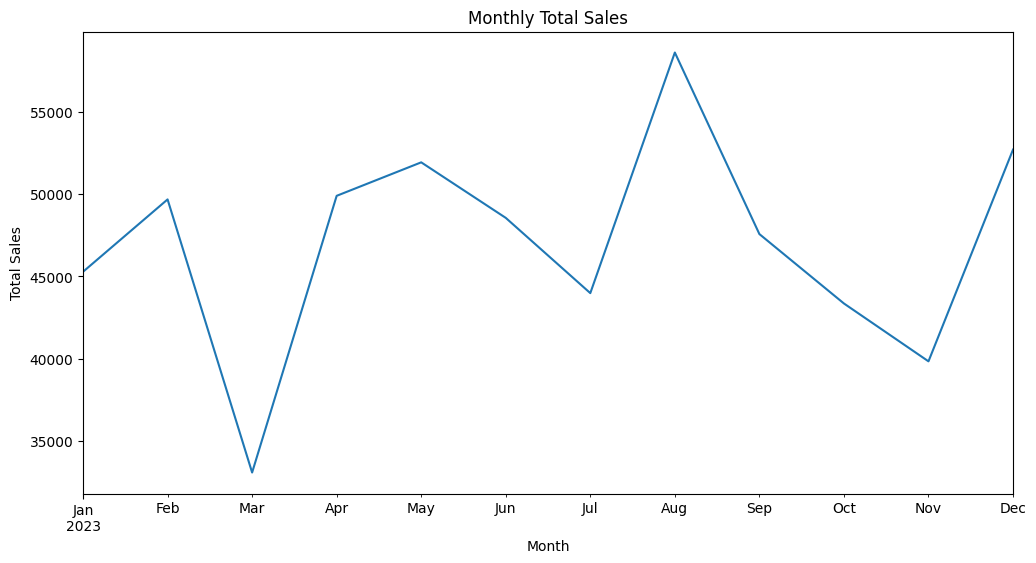

In [6]:
# 問題3: 月ごとの総売上金額を計算し、折れ線グラフで表示してください。
import matplotlib.pyplot as plt

df['Month'] = df['Date'].dt.to_period('M')
answer3 = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(12, 6))
answer3.plot(kind='line')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [7]:
# 問題4: 店舗とカテゴリーごとの総売上金額を計算し、ピボットテーブルで表示してください。
answer4 = df.pivot_table(values='Sales', index='Store', columns='Category', aggfunc='sum')
print("\n問題4の解答:")
print(answer4)



問題4の解答:
Category  Clothing  Electronics  Groceries  Home Goods
Store                                                 
Store_1      28765        35978      30484       26864
Store_2      34064        28060      21137       29205
Store_3      29954        31326      29472       21183
Store_4      27475        24077      20899       30734
Store_5      28185        23824      26210       36553


In [11]:
# 問題5: 各日付の、最も売上金額が高かった店舗とその売上金額を表示してください。
# idxmax:
answer5 = df.loc[df.groupby('Date')['Sales'].idxmax()]
print("\n問題5の解答:")
print(type(answer5))
display(answer5[['Date', 'Store', 'Sales']])


問題5の解答:
<class 'pandas.core.frame.DataFrame'>


,Date,Store,Sales
0,2023-01-01,Store_4,628
6,2023-01-02,Store_4,974
9,2023-01-03,Store_1,905
13,2023-01-04,Store_2,784
15,2023-01-05,Store_3,972
...,...,...,...
986,2023-12-26,Store_3,995
990,2023-12-27,Store_5,878
991,2023-12-29,Store_4,936
993,2023-12-30,Store_4,795


In [12]:
# 問題6: 週ごとの総売上金額を計算し、前週比の増減率も併せて表示してください。
df['Week'] = df['Date'].dt.to_period('W')
weekly_sales = df.groupby('Week')['Sales'].sum()
answer6 = pd.DataFrame({
    'Sales': weekly_sales,
    'Percent_Change': weekly_sales.pct_change() * 100
})
print("\n問題6の解答:")
display(answer6)


問題6の解答:


,Sales,Percent_Change
Week,,
2022-12-26/2023-01-01,1865,NaN
2023-01-02/2023-01-08,13582,628.257373
2023-01-09/2023-01-15,12688,-6.582241
2023-01-16/2023-01-22,7263,-42.756936
2023-01-23/2023-01-29,8816,21.382349
2023-01-30/2023-02-05,9997,13.396098
2023-02-06/2023-02-12,12804,28.078424
2023-02-13/2023-02-19,9357,-26.921275
2023-02-20/2023-02-26,12678,35.492145
